# 1 Часть

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


**Таргет - Бинарная классификация (Exited). Цель модели точно предсказывать отток клиентовМетрика F1-Score**


In [ ]:
data = pd.read_csv("/content/Churn_Modelling.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

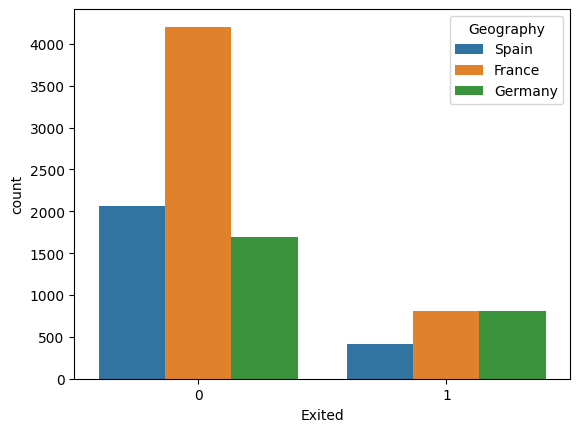

In [ ]:
sns.countplot(data=data, x='Exited', hue='Geography', dodge=True)
plt.show()

In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


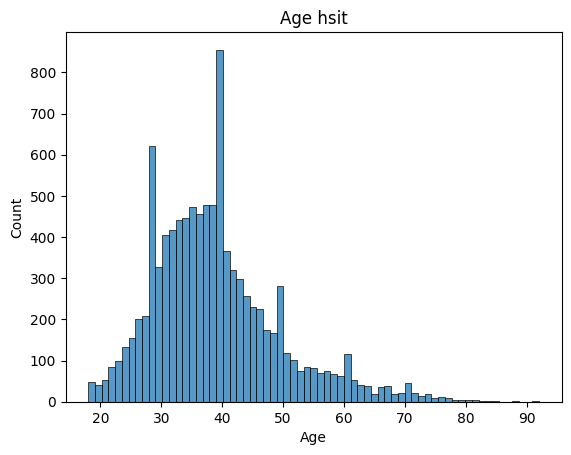

In [ ]:
plt.title('Age hsit')
sns.histplot(data=data, x='Age')
plt.show()

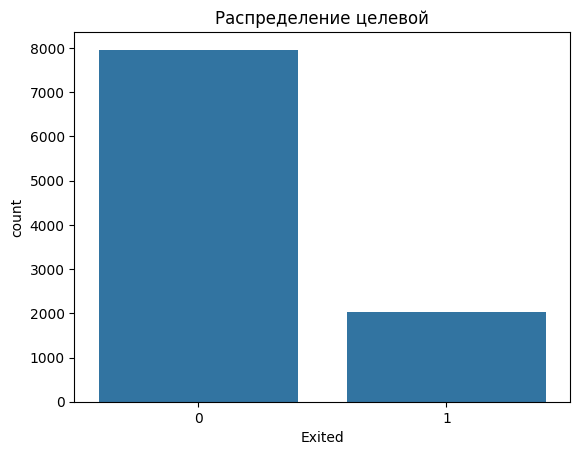

In [ ]:
plt.title("Распределение целевой")
sns.countplot(data=data, x='Exited')
plt.show()

Большой дисбаланс классов - плохо, метрика f1_score  к нему устойчива, так что для нас это не большая проблема. В этом случае точно нельзя было бы выбирать accuracy

In [ ]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

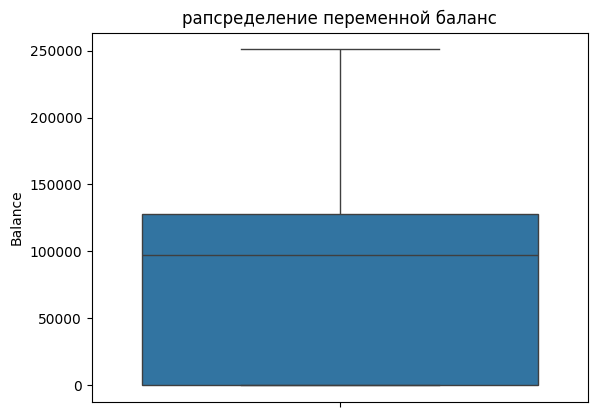

In [ ]:
plt.title("рапсределение переменной баланс")
sns.boxplot(data=data, y='Balance')
plt.show()

In [ ]:
len(data["CustomerId"].unique())

10000

то есть каждая запись у нас уникальна и тогда теряется смысл колонки. и следующих тоже Surname, RowId их можно спокойно дропнуть потому что никакой информации кроме перечисления они не несут, а фамилии, к тому же еще и там повторяются, но это лишь совпадения

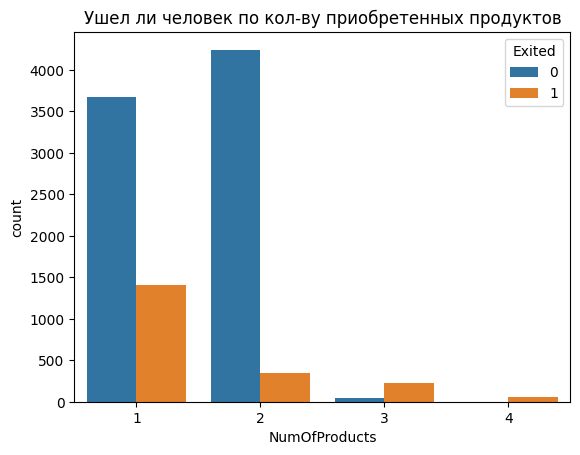

In [ ]:
plt.title("Ушел ли человек по кол-ву приобретенных продуктов")
sns.countplot(data=data, x='NumOfProducts', hue='Exited')
plt.show()

вообще довольно странное наблюдение, что если человек имеет больше двух продуктов, то скорее всего он уйдет... (скам банк???)
а самые лольняые клиенты это те, кто имеет два продукта

<Axes: xlabel='EstimatedSalary', ylabel='count'>

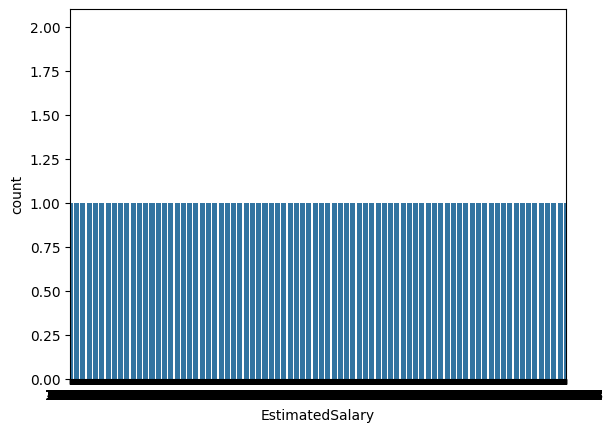

In [ ]:
sns.countplot(data=data, x='EstimatedSalary')

Построение базовой модели и нахождение безлайна

Как писали раньше, можно дропнуть первые три столбика. Тк ничего полезного они не несут. Для построения базовой модели воспользуемся гипотезой, что и страна ничего полезного не несет и дропнем и столбец с ней.

In [ ]:
clean_data = data.drop(columns=["RowNumber",'CustomerId','Surname','Geography'])
clean_data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1


Теперь надо сделай, чтобы гендер был не Female, Male. А просто 0 или 1. Для базовой модели сделаем это с помощью replace, потом так делать не будем)

In [ ]:
clean_data["Gender"] = clean_data["Gender"].replace({"Female": 0, "Male": 1})

/tmp/ipython-input-2678691334.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_data["Gender"] = clean_data["Gender"].replace({"Female": 0, "Male": 1})


In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.4 MB/s eta 0:00:00


Теперь обучим две базовые модели и сравним их показатели. Обучим логистическую регрессию и CatBoost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from catboost import CatBoostClassifier

In [ ]:
X = clean_data.drop(columns=["Exited"])
y = clean_data["Exited"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

f1_lr = f1_score(y_test, y_pred_lr)
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr =precision_score(y_test, y_pred_lr)
rec_lr  = recall_score(y_test, y_pred_lr)
print("F1-score:", f1_lr)
print("accuracy: ", acc_lr)
print('recall: ', rec_lr)
print('precision: ', prec_lr)

F1-score: 0.2637795275590551
accuracy:  0.813
recall:  0.16461916461916462
precision:  0.6633663366336634


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Видно, что f1 какой-то слишком маленький) Как и recall. Теперь посмотрим, как себя ведет catBoost

In [ ]:
cat_features = ["Gender",'HasCrCard','IsActiveMember']
model_cb = CatBoostClassifier(
    iterations=400,
    learning_rate=0.1,
    depth=4,
    verbose=0
)
model_cb.fit(X_train, y_train, cat_features=cat_features)
y_pred_cb = model_cb.predict(X_test)
f1_cb = f1_score(y_test, y_pred_cb)
acc_cb = accuracy_score(y_test, y_pred_cb)
prec_cb=precision_score(y_test, y_pred_cb)
rec_cb = recall_score(y_test, y_pred_cb)
print("F1-score:", f1_cb)
print("acc: ", acc_cb)
print('recall: ', rec_cb)
print('pressision: ', prec_cb)

F1-score: 0.5577812018489985
acc:  0.8565
recall:  0.44471744471744473
pressision:  0.7479338842975206


С почти случайными параметрами catBoost получился f1 = 0.57627. Это и будет нашим начальным score, который мы будем пытаться улучшить

# 2 часть


In [ ]:
data.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


Проверим кол-во нулей в переменной баланс

In [ ]:
print((data['Balance'] == 0.0).mean() * 100)

36.17


36 процентов довольно много. Есть предположение сделать из этого отдельный df и посмотреть распределение таргета там

In [ ]:
data_zeros = data[data['Balance'] == 0].copy()

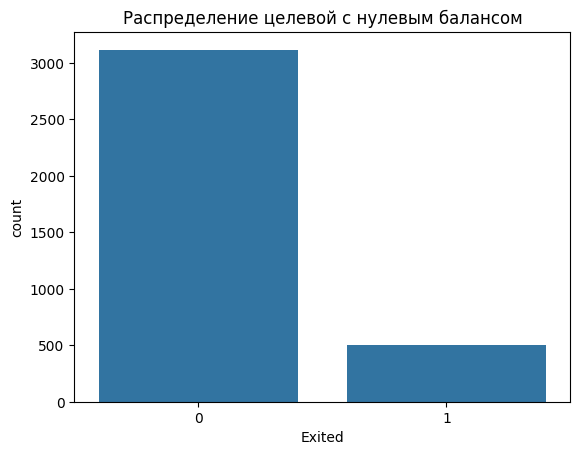

In [ ]:
plt.title("Распределение целевой с нулевым балансом")
sns.countplot(data=data_zeros, x='Exited')
plt.show()

In [ ]:
print('количество единиц в общем датасете', (data['Exited'] == 1).mean() * 100)
print('количество единиц в датасете c нулями', (data_zeros['Exited'] == 1).mean() * 100)

количество единиц в общем датасете 20.369999999999997
количество единиц в датасете c нулями 13.823610727121924


Разница есть, но не такая, чтобы считаться аномалией

распределение balance нельзя назвать нормальным. Тк все-таки большое, количество нулей, что является минимумом. Поэтому проверим на выбросы с помощью IQR

In [ ]:
balances = data["Balance"].values
Q1 = np.percentile(balances, 25)
Q3 = np.percentile(balances, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_outliers = data[(data["Balance"] < lower_bound) | (data["Balance"] > upper_bound)]


print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Нижняя границы: {lower_bound}")
print(f"Верхняя граница: {upper_bound}")
print(f"Количество: {len(iqr_outliers)}")

Q1: 0.0
Q3: 127644.24
IQR: 127644.24
Нижняя границы: -191466.36000000002
Верхняя граница: 319110.60000000003
Количество: 0


выбросов в балансе нет

Рассмотрим другие переменные

In [ ]:
print((data['Age'] > 80).sum())

12


In [ ]:
df_90plus = data[data['Age']>=80].copy()
df_90plus

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
310,311,15712287,Pokrovskii,652,France,Female,80,4,0.00,2,1,1,188603.07,0
766,767,15810864,Williamson,700,France,Female,82,2,0.00,2,0,1,182055.36,0
2458,2459,15813303,Rearick,513,Spain,Male,88,10,0.00,2,1,1,52952.24,0
3033,3034,15578006,Yao,787,France,Female,85,10,0.00,2,1,1,116537.96,0
3387,3388,15798024,Lori,537,Germany,Male,84,8,92242.34,1,1,1,186235.98,0
3531,3532,15653251,Hickey,408,France,Female,84,8,87873.39,1,0,0,188484.52,1
3994,3995,15763097,Siciliano,809,Spain,Male,80,8,0.00,2,0,1,34164.05,0
4931,4932,15772341,Hs?eh,682,Germany,Male,81,6,122029.15,1,1,1,50783.88,0
6443,6444,15764927,Rogova,753,France,Male,92,3,121513.31,1,0,1,195563.99,0
6759,6760,15660878,T'ien,705,France,Male,92,1,126076.24,2,1,1,34436.83,0


Д тоже нельзя сказать, что это выбросы. Людей, которые старше 90 лет 2 человека. Старше 80 - 12. С точки зрения логики и бизнеса это нельзя считать выбросами

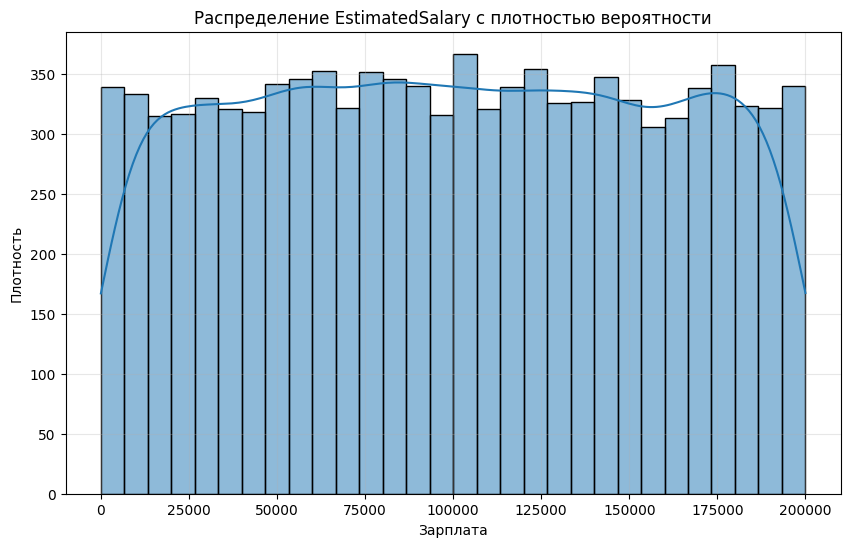

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data['EstimatedSalary'], kde=True, bins=30)
plt.title('Распределение EstimatedSalary с плотностью вероятности')
plt.xlabel('Зарплата')
plt.ylabel('Плотность')
plt.grid(alpha=0.3)
plt.show()

Распределение равномерное, го попробуем isolationforest. Чтобы найти выбросы, но есть предположения, что их нет вообще

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:

estimated_salary = data["EstimatedSalary"].values.reshape(-1, 1)
iso = IsolationForest(
    contamination=0.01,
    random_state=42
)

iso.fit(estimated_salary)
labels = iso.predict(estimated_salary)
outliers = np.where(labels == -1)[0]
print("Количество выбросов:", len(outliers))
print("Индексы выбросов:", outliers)

Количество выбросов: 100
Индексы выбросов: [ 118  149  195  206  247  364  393  396  431  458  559  657  925  932
  982 1014 1139 1295 1378 1451 1462 1585 1758 1986 2046 2362 2421 2498
 2723 2956 3027 3391 3413 3429 3446 3580 3658 3789 3830 3937 4034 4065
 4177 4383 4417 4486 4504 4547 4553 4774 4989 5087 5120 5191 5548 5631
 5652 5675 5837 5876 5947 5958 5963 6007 6089 6125 6254 6402 6646 6793
 6956 6982 7020 7224 7226 7565 7640 7776 8088 8117 8140 8166 8219 8274
 8502 8671 8722 8772 8926 9010 9050 9096 9396 9480 9636 9647 9649 9789
 9875 9920]


Найдено 100 выбросов. Посмотрим где они находятся

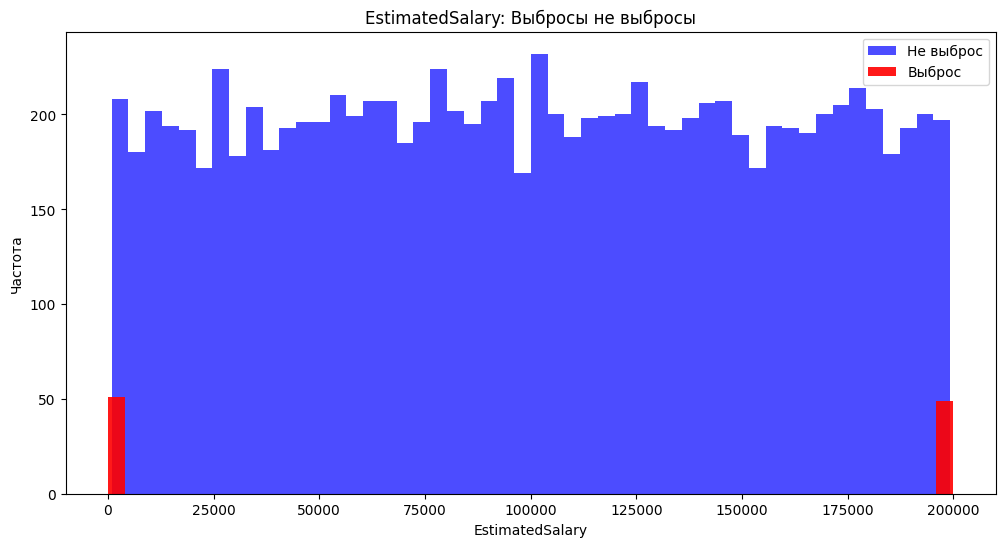

In [ ]:
normal_values = estimated_salary[labels == 1]
outlier_values = estimated_salary[labels == -1]

plt.figure(figsize=(12,6))
plt.hist(normal_values, bins=50, alpha=0.7, label='Не выброс', color='blue')
plt.hist(outlier_values, bins=50, alpha=0.9, label='Выброс', color='red')
plt.xlabel('EstimatedSalary')
plt.ylabel('Частота')
plt.title('EstimatedSalary: Выбросы не выбросы')
plt.legend()
plt.show()

Ну если, честно, то выглядит, как будто эти выбросы выссосаны из пальца, потому что даже они отлично расположены на графике.

Тк данные сделаны искусственно(об этом гласит описание датасета на kaggle), а также после всех исследований  можно сделать вывод, что данные не содержат выбросов. Надеюсь это не будет проблема в оценивании((.

In [ ]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Ну го обрабатывать категориальные переменные. Мы имеем. Geography, Gender, HasCrCard, IsActiveMember, NumofProducts. В целом непонятно, что делать только с Geography. Он и Gender единственные не переработанные данные. Gender надо кодировать с помошью Label Encoding, потому что их всего два. Остальные категориальные признаки уже закодированы и нет смысла делать OHE, тк мы не будем использовать линейные модели, а остальные хорошо справятся и без OHE. Закодируем Geography с помощью Target Encoding

Го сделаем признаки, котоыре будут отражать похожесть.
Сделаем два дополнительных столбца:
1-Средний отток среди похожих клиентов (Тут очевидно, для похожих клиентов, можно сказать, что и отток будет похож)

2- Средний баланс похожих клиентов. Определим к какой финансовой группе можно отнести человека.


Возьмем sqrt(n) соседей sqrt(10000) = 100

In [ ]:
data_new_feature= data.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import NearestNeighbors

In [ ]:
features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
le = LabelEncoder()
data_new_feature["Geography_LE"] = le.fit_transform(data_new_feature["Geography"])
features.append("Geography_LE")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_new_feature[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]])
X_final = np.hstack([X_scaled, data_new_feature[["Geography_LE"]].values])

nn = NearestNeighbors(n_neighbors=101)
nn.fit(X_final)
distances, indices = nn.kneighbors(X_final)
mean_exited_neighbors = []
mean_balance_neighbors = []

for i, neighbors in enumerate(indices):
    neighbors = neighbors[1:]
    mean_exited_neighbors.append(data_new_feature.loc[neighbors, "Exited"].mean())
    mean_balance_neighbors.append(data_new_feature.loc[neighbors, "Balance"].mean())

data_new_feature["MeanExited_Neighbors"] = mean_exited_neighbors
data_new_feature["MeanBalance_Neighbors"] = mean_balance_neighbors

In [ ]:
data_new_feature

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_LE,MeanExited_Neighbors,MeanBalance_Neighbors
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0.38,3699.0225
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2,0.27,104578.2472
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0.46,127615.3905
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0.05,0.0000
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2,0.28,117565.9444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,0.03,0.0000
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,0.13,70010.5443
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0.25,4848.7801
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,0.16,99965.5186


окей, что-то получилось. Теперь добавим контекстных признаков. Несколько гипотез, которые отразим в данных:
Клиенты с очень низким балансом относительно зарплаты более склонны уйти


клиенты с высоким кредитным рейтингом менее склонны к уходу



Подберем параметры и протестируем три модели:
Есть только фичи похожих

Есть только контекстые фичи

Есть и те и те

In [ ]:
data_full_feature = data_new_feature.copy()
data_full_feature["Balance_to_Salary"] = data_full_feature["Balance"] / (data_full_feature["EstimatedSalary"] + 1)
data_full_feature["IsHighCreditScore"] = (data_full_feature["CreditScore"] > 700).astype(int)

In [ ]:
data_full_feature

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_LE,MeanExited_Neighbors,MeanBalance_Neighbors,Balance_to_Salary,IsHighCreditScore
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0.38,3699.0225,0.000000,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2,0.27,104578.2472,0.744670,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0.46,127615.3905,1.401362,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0.05,0.0000,0.000000,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2,0.28,117565.9444,1.587035,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,0.03,0.0000,0.000000,1
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,0.13,70010.5443,0.564102,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0.25,4848.7801,0.000000,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,0.16,99965.5186,0.808222,1


In [ ]:
data_context = data.copy()
data_context ["Balance_to_Salary"] = data_context ["Balance"] / (data_context ["EstimatedSalary"] + 1)
data_context ["IsHighCreditScore"] = (data_context ["CreditScore"] > 700).astype(int)

In [ ]:
data_context

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_to_Salary,IsHighCreditScore
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744670,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401362,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587035,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0.000000,1
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0.564102,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0.000000,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0.808222,1


Теперь надо запустить подбор гиперпараметров с помощью optuna и сравнить результат

In [ ]:
data_full_feature=data_full_feature.drop(columns=["RowNumber",'CustomerId','Surname'])

In [ ]:
data_full_feature=data_full_feature.drop(columns='Geography_LE')

In [ ]:
data_full_feature['Gender'] = data_full_feature['Gender'].map({'Female':0,'Male' : 1})


In [ ]:
data_full_feature=data_full_feature.drop(columns='MeanExited_Neighbors')

было решено убрать эту колонку, потому что мы поняли, что с новыми данными, данную колонку будет невозможно определить, поэтому ей нет место быть

In [ ]:
data_full_feature

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,MeanBalance_Neighbors,Balance_to_Salary,IsHighCreditScore
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,3699.0225,0.000000,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,104578.2472,0.744670,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,127615.3905,1.401362,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,0.0000,0.000000,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,117565.9444,1.587035,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0,0.0000,0.000000,1
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0,70010.5443,0.564102,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1,4848.7801,0.000000,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1,99965.5186,0.808222,1


In [ ]:
X_ff = data_full_feature.drop("Exited", axis=1)
y_ff = data_full_feature["Exited"]

X_train_ff, X_test_ff, y_train_ff, y_test_ff = train_test_split(
    X_ff, y_ff, test_size=0.2, random_state=42, stratify=y_ff
)

geography_means = X_train_ff.join(y_train_ff).groupby('Geography')['Exited'].mean()
X_train_ff['Geography_TE'] = X_train_ff['Geography'].map(geography_means)
X_test_ff['Geography_TE'] = X_test_ff['Geography'].map(geography_means)

X_train_ff = X_train_ff.drop("Geography", axis=1)
X_test_ff = X_test_ff.drop("Geography", axis=1)

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 9.1 MB/s eta 0:00:00


In [ ]:
X_train_ff

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,MeanBalance_Neighbors,Balance_to_Salary,IsHighCreditScore,Geography_TE
2151,753,1,57,7,0.00,1,1,0,159475.08,14758.3126,0.000000,1,0.159028
8392,739,1,32,3,102128.27,1,1,0,63981.37,109082.5619,1.596194,1,0.330673
5006,755,0,37,0,113865.23,2,1,1,117396.25,113790.6720,0.969914,1,0.330673
4117,561,1,37,5,0.00,2,1,0,83093.25,0.0000,0.000000,0,0.159028
7182,692,1,49,6,110540.43,2,0,1,107472.99,115119.1046,1.028532,0,0.330673
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,688,0,35,6,0.00,1,1,0,25488.43,21872.1745,0.000000,0,0.165834
4644,712,1,74,5,0.00,2,0,0,151425.82,12156.6262,0.000000,1,0.165834
8942,667,0,37,9,71786.90,2,1,1,67734.79,50671.6929,1.059808,0,0.159028
2935,687,1,35,8,100988.39,2,1,0,22247.27,113079.9533,4.539157,0,0.165834


In [ ]:
import optuna

In [ ]:
def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 700),
        "depth": trial.suggest_int("depth", 2, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
        "random_state": 42,
        "verbose": 0,
        "eval_metric": "F1",
    }

    model = CatBoostClassifier(**params)
    model.fit(
        X_train_ff, y_train_ff,
        eval_set=(X_test_ff, y_test_ff),
        cat_features=['Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember','IsHighCreditScore'],
        use_best_model=True
    )

    preds = model.predict(X_test_ff)
    f1 = f1_score(y_test_ff, preds)
    return f1

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best F1:", study.best_value)
print("Best params:", study.best_params)

[I 2025-12-02 22:46:30,382] A new study created in memory with name: no-name-3b6acd16-d352-421e-b52e-7ebbb1fe066a
[I 2025-12-02 22:46:40,368] Trial 0 finished with value: 0.6179604261796042 and parameters: {'iterations': 459, 'depth': 6, 'learning_rate': 0.023308508333397426, 'l2_leaf_reg': 8.68156704752728}. Best is trial 0 with value: 0.6179604261796042.
[I 2025-12-02 22:46:46,160] Trial 1 finished with value: 0.5990639625585024 and parameters: {'iterations': 371, 'depth': 7, 'learning_rate': 0.010060085542357922, 'l2_leaf_reg': 8.728024659388971}. Best is trial 0 with value: 0.6179604261796042.
[I 2025-12-02 22:46:52,456] Trial 2 finished with value: 0.6123680241327301 and parameters: {'iterations': 391, 'depth': 8, 'learning_rate': 0.08485179960592173, 'l2_leaf_reg': 4.77979940646212}. Best is trial 0 with value: 0.6179604261796042.
[I 2025-12-02 22:46:57,974] Trial 3 finished with value: 0.6317365269461078 and parameters: {'iterations': 394, 'depth': 6, 'learning_rate': 0.06130363

Best F1: 0.6317365269461078
Best params: {'iterations': 394, 'depth': 6, 'learning_rate': 0.06130363613339244, 'l2_leaf_reg': 4.130915198564304}


Это уже круто

In [ ]:
#Best F1: 0.6317365269461078
#Best params: {'iterations': 394, 'depth': 6, 'learning_rate': 0.06130363613339244, 'l2_leaf_reg': 4.130915198564304}

для общей

теперь протестим на только контекстных

In [ ]:
data_context=data_context.drop(columns=["RowNumber",'CustomerId','Surname'])

In [ ]:
data_context['Gender'] = data_context['Gender'].map({'Female':0,'Male' : 1})

In [ ]:
X_con = data_context.drop("Exited", axis=1)
y_con = data_context["Exited"]

X_train_con, X_test_con, y_train_con, y_test_con = train_test_split(
    X_con, y_con, test_size=0.2, random_state=42, stratify=y_con
)

geography_means = X_train_con.join(y_train_con).groupby('Geography')['Exited'].mean()
X_train_con['Geography_TE'] = X_train_con['Geography'].map(geography_means)
X_test_con['Geography_TE'] = X_test_con['Geography'].map(geography_means)

X_train_con = X_train_con.drop("Geography", axis=1)
X_test_con = X_test_con.drop("Geography", axis=1)

In [ ]:
def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 700),
        "depth": trial.suggest_int("depth", 2, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
        "random_state": 42,
        "verbose": 0,
        "eval_metric": "F1",
    }

    model = CatBoostClassifier(**params)
    model.fit(
        X_train_con, y_train_con,
        eval_set=(X_test_con, y_test_con),
        cat_features=['Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember','IsHighCreditScore'],
        use_best_model=True
    )

    preds = model.predict(X_test_con)
    f1 = f1_score(y_test_con, preds)
    return f1

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

print("Best F1:", study.best_value)
print("Best params:", study.best_params)

[I 2025-12-02 23:02:03,767] A new study created in memory with name: no-name-65cc2c61-e377-4850-af84-a82e13d203f6
[I 2025-12-02 23:02:13,135] Trial 0 finished with value: 0.6029850746268657 and parameters: {'iterations': 682, 'depth': 7, 'learning_rate': 0.2546201262572531, 'l2_leaf_reg': 1.3310390185417937}. Best is trial 0 with value: 0.6029850746268657.
[I 2025-12-02 23:02:14,841] Trial 1 finished with value: 0.5119453924914675 and parameters: {'iterations': 275, 'depth': 2, 'learning_rate': 0.011253960065585836, 'l2_leaf_reg': 3.7604270829018818}. Best is trial 0 with value: 0.6029850746268657.
[I 2025-12-02 23:02:19,658] Trial 2 finished with value: 0.6220238095238095 and parameters: {'iterations': 344, 'depth': 7, 'learning_rate': 0.24098302806963048, 'l2_leaf_reg': 7.242950928390227}. Best is trial 2 with value: 0.6220238095238095.
[I 2025-12-02 23:02:20,748] Trial 3 finished with value: 0.6156156156156156 and parameters: {'iterations': 196, 'depth': 3, 'learning_rate': 0.177717

Best F1: 0.6255639097744361
Best params: {'iterations': 211, 'depth': 6, 'learning_rate': 0.2935917286089464, 'l2_leaf_reg': 4.947444516314087}


выдал скор чуть хуже, теперь сравним с похожими

In [ ]:
data_new_feature=data_new_feature.drop(columns=["RowNumber",'CustomerId','Surname','Geography_LE','MeanExited_Neighbors'])

In [ ]:
data_new_feature

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,MeanBalance_Neighbors
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,3699.0225
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,104578.2472
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,127615.3905
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.0000
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,117565.9444
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0.0000
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,70010.5443
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,4848.7801
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,99965.5186


In [ ]:
X_new = data_new_feature.drop("Exited", axis=1)
y_new = data_new_feature["Exited"]

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y_new, test_size=0.2, random_state=42, stratify=y_new
)

geography_means = X_train_new.join(y_train_new).groupby('Geography')['Exited'].mean()
X_train_new['Geography_TE'] = X_train_new['Geography'].map(geography_means)
X_test_new['Geography_TE'] = X_test_new['Geography'].map(geography_means)

X_train_new = X_train_new.drop("Geography", axis=1)
X_test_new = X_test_new.drop("Geography", axis=1)

In [ ]:
def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 700),
        "depth": trial.suggest_int("depth", 2, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
        "random_state": 42,
        "verbose": 0,
        "eval_metric": "F1",
    }

    model = CatBoostClassifier(**params)
    model.fit(
        X_train_new, y_train_new,
        eval_set=(X_test_new, y_test_new),
        cat_features=['Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember'],
        use_best_model=True
    )

    preds = model.predict(X_test_new)
    f1 = f1_score(y_test_new, preds)
    return f1

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

print("Best F1:", study.best_value)
print("Best params:", study.best_params)

[I 2025-12-02 23:10:29,869] A new study created in memory with name: no-name-a1874cc4-32b2-4111-98f3-f11131f3a926
[I 2025-12-02 23:10:32,676] Trial 0 finished with value: 0.6142208774583964 and parameters: {'iterations': 434, 'depth': 2, 'learning_rate': 0.06881737180636881, 'l2_leaf_reg': 2.5590621092609016}. Best is trial 0 with value: 0.6142208774583964.
[I 2025-12-02 23:10:36,312] Trial 1 finished with value: 0.6193353474320241 and parameters: {'iterations': 394, 'depth': 5, 'learning_rate': 0.24283470458550616, 'l2_leaf_reg': 4.823648748179474}. Best is trial 1 with value: 0.6193353474320241.
[I 2025-12-02 23:10:40,053] Trial 2 finished with value: 0.5950155763239875 and parameters: {'iterations': 439, 'depth': 4, 'learning_rate': 0.015423539319582232, 'l2_leaf_reg': 4.240195783486017}. Best is trial 1 with value: 0.6193353474320241.
[I 2025-12-02 23:10:55,772] Trial 3 finished with value: 0.6192592592592593 and parameters: {'iterations': 668, 'depth': 9, 'learning_rate': 0.217412

Best F1: 0.6318926974664679
Best params: {'iterations': 615, 'depth': 4, 'learning_rate': 0.06949282292980377, 'l2_leaf_reg': 1.6896136833743403}


Все три модели выдали +- одинаковый score делаем вывод, что дело не в новых фичах, а в том, что я учитываю страну

внезапно попробуем другую модель

In [ ]:
pd.DataFrame(X_train_ff).to_csv('x_train_ff.csv', index=False)
pd.DataFrame(X_test_ff).to_csv('x_test_ff.csv', index=False)